## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master ```


## Problem 2: Sales Data Analysis

In [1]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [2]:
df[['TV','radio']] 

,TV,radio
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9
4,151.5,41.3
5,180.8,10.8
6,8.7,48.9
7,57.5,32.8
8,120.2,19.6
9,8.6,2.1
10,199.8,2.6



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

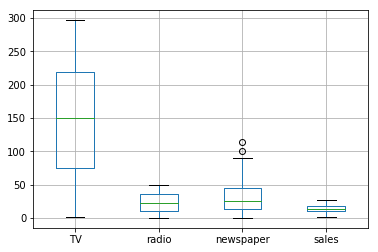

In [5]:
df.boxplot()

### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

In [26]:
plt.scatter('TV','radio','newspaper')

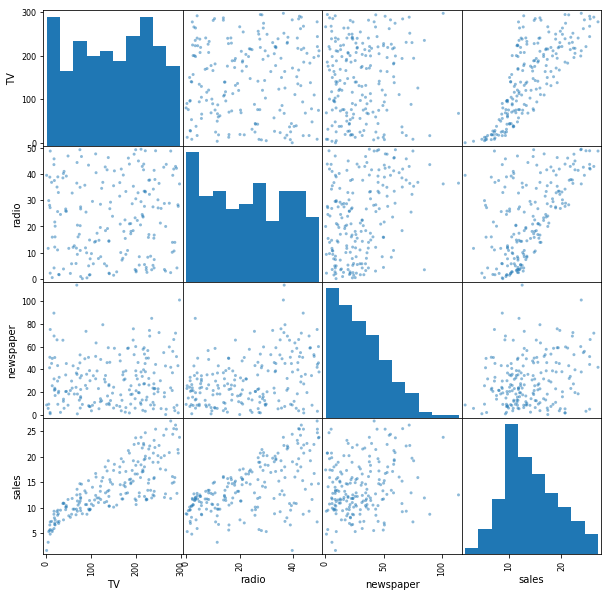

In [6]:
from pandas.plotting import scatter_matrix 
scatter_matrix(df,figsize=(10,10))  #use scatter_matrix to show relations among four groups
plt.show()

Which of the variables seem correlated with one another? Which don't? Explain your answer

In [6]:
#Among TV,radio,and newspaper, there seems no correlation among these. 
#But TV and radio seem like have a near'linear' correlation with sale.

#Now use df.corr to measure the correlations
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [ ]:
#Based on the graph above, we could see the correlation between TV&sales (0.78) and radio&sales (0.58) were much stronger than other groups.

### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
import numpy as np

a) Set y to be the sales in df

In [24]:
y=df['sales']

b) Set X to be just the features described above in df

In [25]:
X=df.drop(['sales'],1)

c) Randomly split data into training and testing - 80% training, 20% testing.

In [26]:
X_train, X_test, y_train, y_test=train_test_split(
    X, y, test_size=0.2,random_state=42)
regr=LinearRegression()

d) Train model on training data, and make predictions on testing data

In [27]:
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

e) Evalute the R^2 on **testing** data. Is this good? Bad? Why?

In [29]:
print('Coefficients: \n',regr.coef_)
print("Residual sum of squares: %.2f"
     % np.mean((regr.predict(X_test)-y_test)**2))
print('R^2 Score: %.2f' % regr.score(X_test, y_test))

Coefficients: 
 [0.04472952 0.18919505 0.00276111]
Residual sum of squares: 3.17
R^2 Score: 0.90


In [ ]:
#data is quiet with R^2=0.9

f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

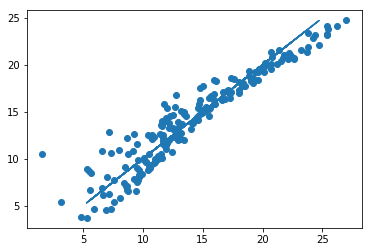

In [30]:
plt.scatter(y,regr.predict(X))
plt.plot(y_test,y_test)

In [ ]:
# As shown above, the model fits quiet well with R^2=0.9, and the result close to linear although there are still some spots outside

g) Can you measure the importance of features in this model? What is something you should check before making conclusions?

Try looking at LinearRegression().coef_

In [40]:
# measure Standarize coefficients
#remove collinear features to see the importance of the features in the model
from sklearn import preprocessing

scaler=preprocessing.StandardScaler()
X2=X.as_matrix().astype(np.float)
X2=scaler.fit_transform(X)

size=float(len(X))
X_train=X[0:int(size*0.8)]
X_test=X[int(size*0.8):]

#split the targets into training/testing sets
y_train=y[0:int(size*0.8)]
y_test=y[int(size*0.8):]

#create linear regression object
regr=LinearRegression()

#train the model using the training sets
regr.fit(X_train,y_train)

#the cofficients
print('Coefficients: \n', regr.coef_)
#the mean square error
print("Residual sum of square: %.2f"
     %np.mean((regr.predict(X_test)-y_test)**2))

#eplain variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

Coefficients: 
 [ 0.0472521   0.179922   -0.00094408]
Residual sum of square: 2.79
Variance score: 0.90


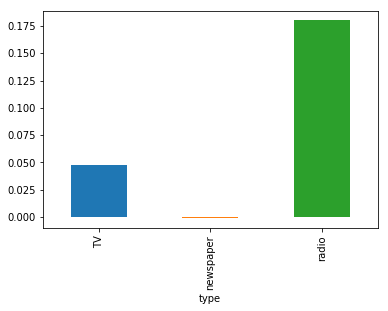

In [41]:
regr.coef_
df=pd.DataFrame({'type':['TV','radio','newspaper'],'coef':regr.coef_})
df.groupby('type')['coef'].mean().plot(kind='bar')

In [ ]:
# figure above is the result before normalization

Coefficients: 
 [ 0.77430407  0.50534068 -0.00398213]
Residual sum of squares: 0.10
Variance score: 0.90


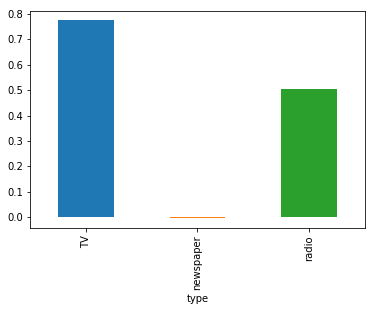

In [42]:
#normalize the result
x_train = preprocessing.scale(X_train)
y_train = preprocessing.scale(y_train)
x_test = preprocessing.scale(X_test)
y_test = preprocessing.scale(y_test)

# Train the model using the training sets
regr.fit(x_train, y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(x_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test, y_test))
regr.coef_
df = pd.DataFrame({'type':['TV','radio','newspaper'], 'coef':regr.coef_})
df.groupby('type')['coef'].mean().plot(kind='bar')

h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

In [ ]:
#from the figure above, TV has the most significant impact.

## How could you have improved performance?

*Hint:* Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model

D:\Users\hy252\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


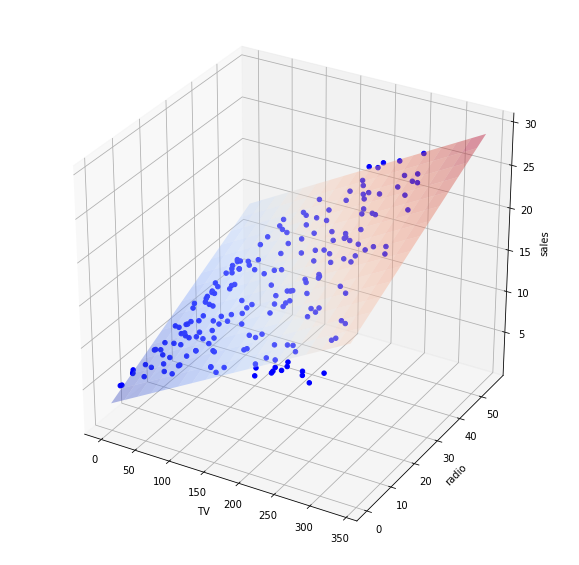

In [54]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
from matplotlib import cm

csv = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
model = sm.ols(formula='sales ~ TV + radio', data = csv)
fit = model.fit()

fit.summary()

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(0, 350, 20)                # generate a mesh
y_surf = np.arange(0, 60, 4)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'TV': x_surf.ravel(), 'radio': y_surf.ravel()})
out = fit.predict(exog = exog)
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4,cmap=cm.coolwarm)

ax.scatter(csv['TV'], csv['radio'], csv['sales'],
           c='blue',
           marker='o',
           alpha=1)

ax.set_xlabel('TV')
ax.set_ylabel('radio')
ax.set_zlabel('sales')

plt.show()

In [ ]:
#There are some nonlinear interaction, some larger values of TV and radio are away from the ploteform

In [57]:
# mixture terms (non-linear term)

X['TV*radio']=X['TV']*X['radio']

size=float(len(X))
X_train=X[0:int(size*0.8)]
X_test=X[int(size*0.8):]

#split the targets into training/testing sets
y_train=y[0:int(size*0.8)]
y_test=y[int(size*0.8):]

#create linear regression object
regr=LinearRegression()

#train the model using the training sets
regr.fit(X_train, y_train)

#the coefficients
print('Coefficients: \n', regr.coef_)

#the mean square error
print("Residual sum of squares: %.2f"
     %np.mean((regr.predict(X_test)-y_test)**2))

#eplain variance score:1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

Coefficients: 
 [0.01918396 0.02648516 0.00109794]
Residual sum of squares: 0.39
Variance score: 0.99


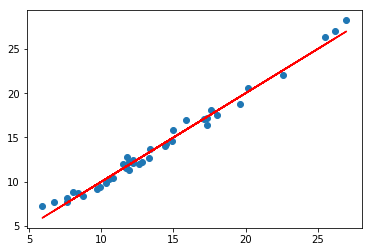

In [58]:
plt.scatter(y_test,regr.predict(X_test))
plt.plot(y_test,y_test,color='r')

D:\Users\hy252\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Wed, 28 Feb 2018   Prob (F-statistic):          6.68e-146
Time:                        21:03:47   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.0

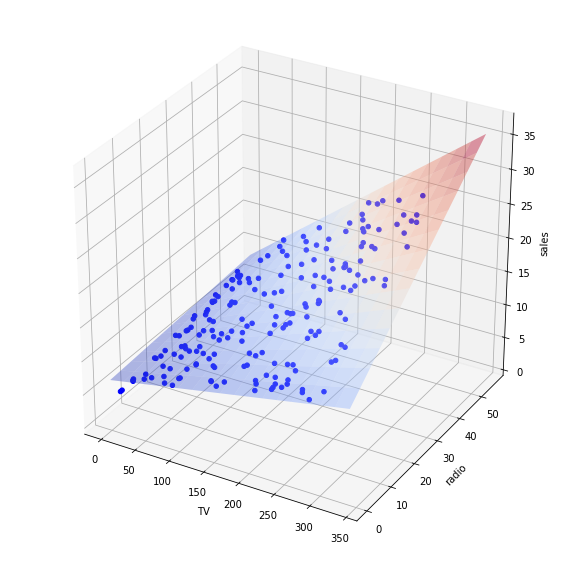

In [64]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
from matplotlib import cm

csv = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

# Create a linear OLS model with TV:Radio interaction term 
# such that sales = beta_0 + beta_1 * TV + beta_2 * Radio + beta_3 * radio * TV
model = sm.ols(formula='sales ~ TV * radio', data = csv)
fit = model.fit()

fit.summary()

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(0, 350, 20) 
y_surf = np.arange(0, 60, 4)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'TV': x_surf.ravel(), 'radio': y_surf.ravel()})
out = fit.predict(exog = exog)

# Create surface plot
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4,cmap=cm.coolwarm)

# Create scatter plot
ax.scatter(csv['TV'], csv['radio'], csv['sales'],
           c='blue',
           marker='o',
           alpha=1)

ax.set_xlabel('TV')
ax.set_ylabel('radio')
ax.set_zlabel('sales')

# Print OLS regression results
print(fit.summary())

plt.show()

In [96]:
#using a nonlinear-non parametric model
#before run this part, need to fresh the hw and re-run the very first part to get the raw data including sales

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
y = df['sales']
X=df.drop(['sales'],1)

from sklearn.tree import DecisionTreeRegressor

#Choose 80% for training, 20% for testing. This should really be done randomly.
size = float(len(X))
X_train = X[0:int(size*0.8)]
X_test = X[int(size*0.8):]

# Split the targets into training/testing sets
y_train = y[0:int(size*0.8)]
y_test = y[int(size*0.8):]

# Create linear regression object
regr = DecisionTreeRegressor(max_depth=5)

# Train the model using the training sets
regr.fit(X_train, y_train)


# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

Residual sum of squares: 0.94
Variance score: 0.96


Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 100 iterations b = 0.03507497059234178, m = 1.4788027175308358, error = 112.64705664288809


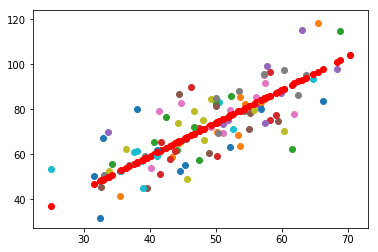

In [85]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]
errors=[]

def run(num_iterations,learning_rate = 0.0001):
    points = genfromtxt("/Users/hy252/Documents/APMAE4990--master/data/data.csv", delimiter=",")
    learning_rate = learning_rate
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

run(100)

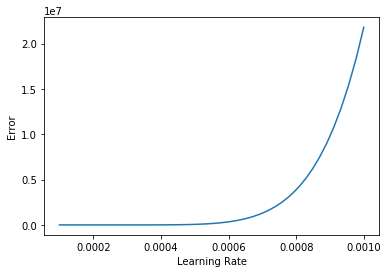

In [87]:
points = genfromtxt("/Users/hy252/Documents/APMAE4990--master/data/data.csv", delimiter=",")

initial_b = 0 # initial y-intercept guess
initial_m = 0 # initial slope guess
num_iterations = 3
#print "Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points))
#print "Running..."
errors=[]
learning_rates = np.logspace(-4,-3,100)

for l in learning_rates:
    learning_rate = l
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    errors.append(compute_error_for_line_given_points(b, m, points))

plt.xlabel('Learning Rate')
plt.ylabel('Error')

plt.plot(learning_rates,errors,label='num_iterations='+str(num_iterations))

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


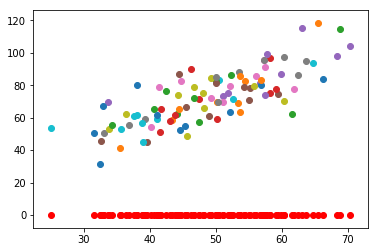

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.014547010110737297, m = 0.7370702973591052, error = 1484.586557408649


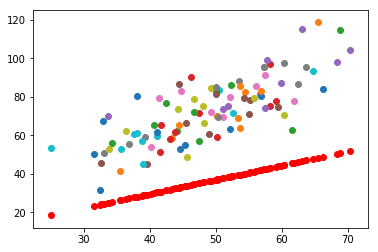

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.02187396295959641, m = 1.1067954543515157, error = 457.8542575737673


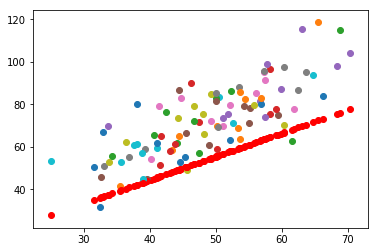

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.025579224321293136, m = 1.2922546649131115, error = 199.50998572553894


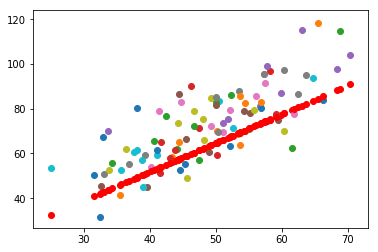

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.027467789559144355, m = 1.385283255651245, error = 134.50591058200533


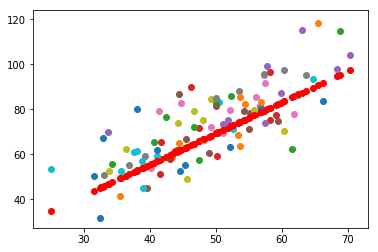

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.028445071981738963, m = 1.4319472323843205, error = 118.14969342239947


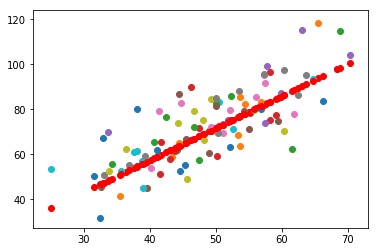

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.02896524076647862, m = 1.4553540088980408, error = 114.0341490603815


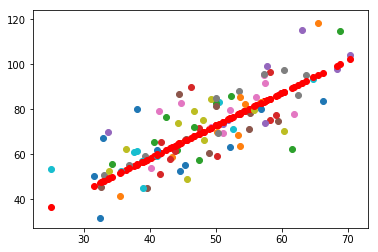

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.0292561141260467, m = 1.4670946177201354, error = 112.99857731713661


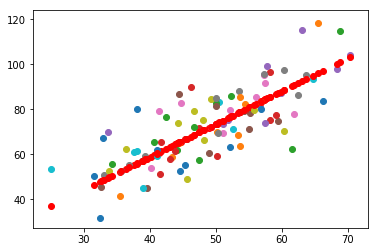

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.02943196916380713, m = 1.4729832982243762, error = 112.7379818756847


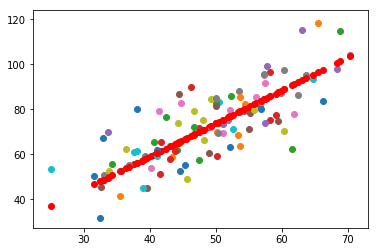

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.029550129024383073, m = 1.4759365618962286, error = 112.67238435909097


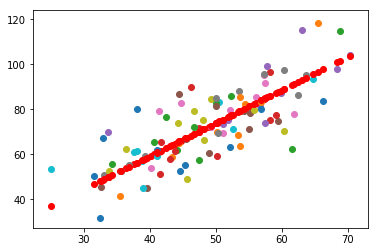

In [88]:
# Use this to visually discuss convergence rate based on learning rate

for num in range(0,10):
    run(num)
    plt.show()

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


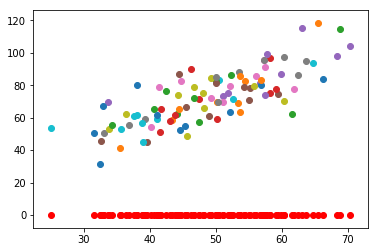

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 1454.7010110737297, m = 73707.02973591052, error = 13542667625800.89


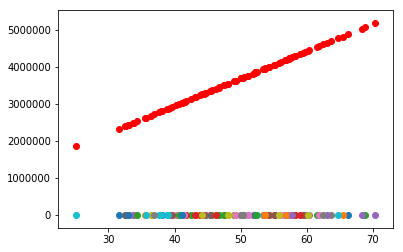

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = -72197663.21675964, m = -3673303989.60748, error = 3.3636916490400677e+22


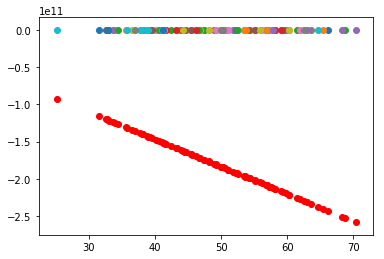

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 3598149177362.046, m = 183068173802790.72, error = 8.354647564678013e+31


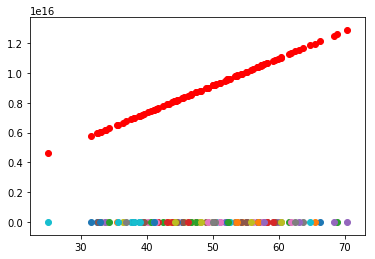

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = -1.7932264810999088e+17, m = -9.123654438117506e+18, error = 2.075105069452479e+41


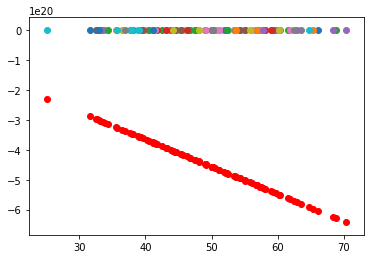

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 8.936986917486659e+21, m = 4.546998452928957e+23, error = 5.154090601586419e+50


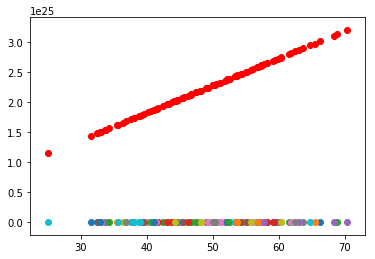

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = -4.453968085187882e+26, m = -2.2661089447403784e+28, error = 1.2801592709891363e+60


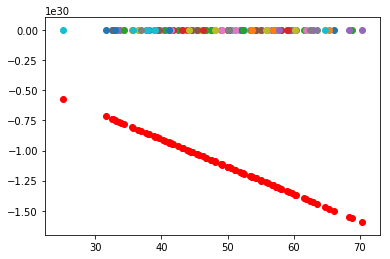

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 2.2197449640500537e+31, m = 1.1293713430063897e+33, error = 3.179625438860186e+69


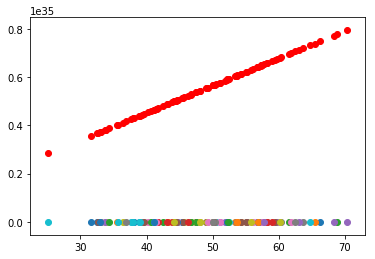

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = -1.1062647084993037e+36, m = -5.628500930480129e+37, error = 7.897468823262245e+78


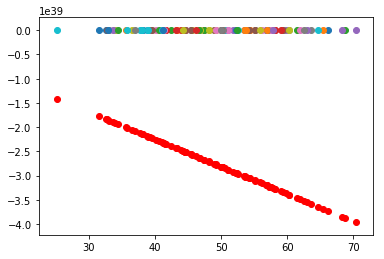

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 5.513343312369162e+40, m = 2.8051024068030055e+42, error = 1.9615522335472674e+88


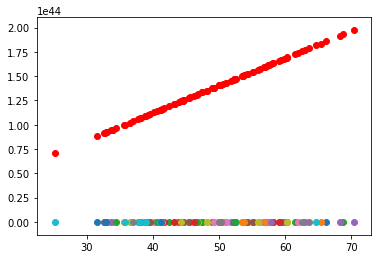

In [89]:
learning_rate = 10
for num in range(0,10):
    run(num,learning_rate)
    plt.show()

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


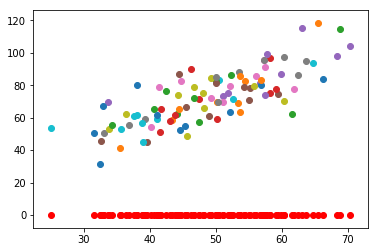

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.0014547010110737297, m = 0.07370702973591052, error = 5035.166806835488


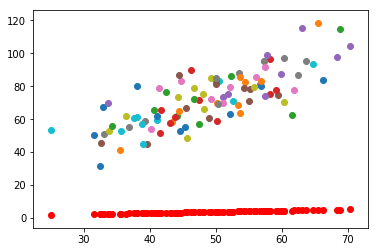

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.0028372014495286774, m = 0.14374060806815414, error = 4556.7323715944


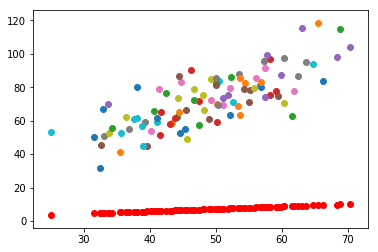

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.004151099681139559, m = 0.21028381419066666, error = 4124.798445175136


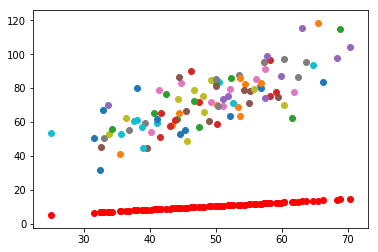

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.005399814734639951, m = 0.27351060291065116, error = 3734.8455006002387


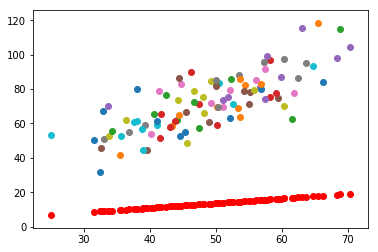

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.006586595239605855, m = 0.3335862593940432, error = 3382.7932775716404


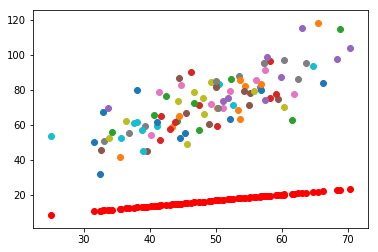

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.0077145279188888345, m = 0.3906678312471585, error = 3064.958088795723


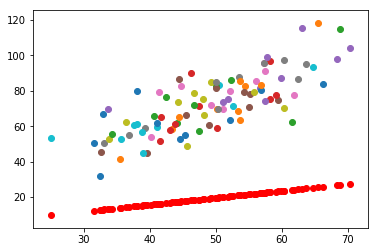

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.008786545657799282, m = 0.4449045390640527, error = 2778.014275837526


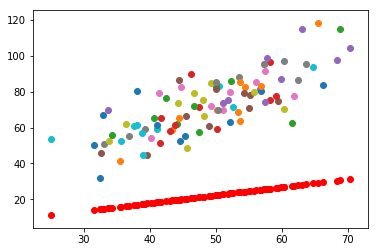

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.009805435171133943, m = 0.49643816651282946, error = 2518.959411198589


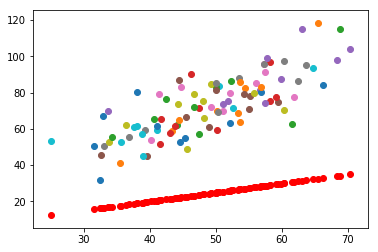

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.010773844288090539, m = 0.5454034309806438, error = 2285.082882511535


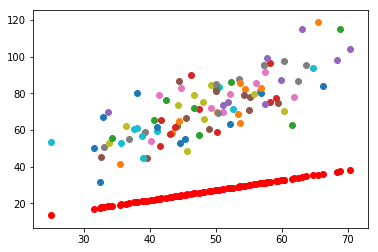

In [90]:
learning_rate = 0.00001
for num in range(0,10):
    run(num,learning_rate)
    plt.show()

## Problem 3 Part 2

Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.

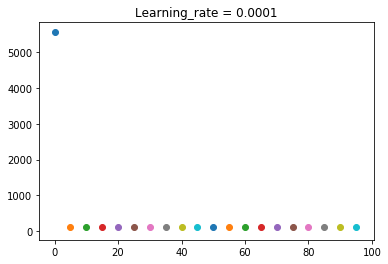

In [92]:
def errorplot(num_iterations, learning_rate):
    points = genfromtxt("/Users/hy252/Documents/APMAE4990--master/data/data.csv", delimiter=",")
    learning_rate = learning_rate
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    error =  compute_error_for_line_given_points(b, m, points)
    plt.scatter(num_iterations, error)
    
Learning_rate = 0.0001
for num in range(0,100,5):
    errorplot(num, Learning_rate)
    plt.title('Learning_rate = 0.0001')

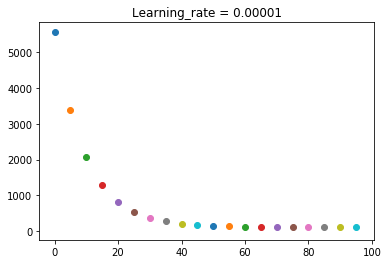

In [93]:
Learning_rate = 0.00001
for num in range(0,100,5):
    errorplot(num, Learning_rate)
    plt.title('Learning_rate = 0.00001')

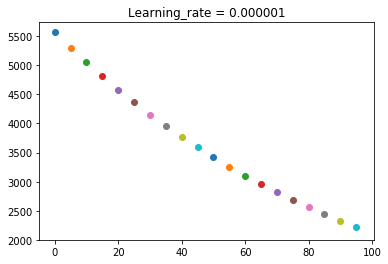

In [94]:
Learning_rate = 0.000001
for num in range(0,100,5):
    errorplot(num, Learning_rate)
    plt.title('Learning_rate = 0.000001')

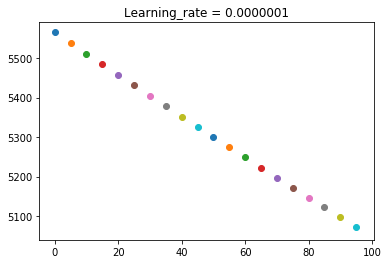

In [95]:
Learning_rate = 0.0000001
for num in range(0,100,5):
    errorplot(num, Learning_rate)
    plt.title('Learning_rate = 0.0000001')